In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def hypothesis(w, x):
    return 1 / (1 + np.exp(-(w.transpose().dot(x)[0][0])))

In [ ]:
def loss_singular(x, y, w):
    h_x = hypothesis(w, x)
    
    return -y*np.log(h_x) - (1 - y)*np.log(1 - h_x)

In [ ]:
def loss_function(X, y, w):
    n = y.shape[0]
    y_predict = np.array(list(map(lambda x: 
                                  hypothesis(w, x.reshape(-1, 1)), X))).reshape(-1, 1)
    diff = y_predict - y
    
    gradient = np.zeros((w.shape[0]))
    gradient = 1/n *  (X.transpose().dot(diff))
    
    loss = 0
    for i in range(n):
        x_i = X[i, :].reshape(-1, 1)
        y_i = y[i][0]
        
        loss += loss_singular(x_i, y_i, w)  
    
    loss /= n
    
    return loss, gradient

In [6]:
def gradient_descent(X, y, w, alpha=0.01, num_iter=500, eps=10e-3, plot=False):
    loss_history = np.zeros((num_iter, 1))
    it_break = num_iter
    
    for i in range(num_iter):
        loss, gradient = loss_function(X, y, w)
        w = w - alpha*gradient
        
        loss_history[i] = loss
        # print(f'Iteration {i+1}: Loss = {loss}')
        
        if i > 0 and np.abs(loss - loss_history[i-1]) <= eps:
            it_break = i
            break
        
    return w, loss_history, it_break

In [ ]:
# Ova funkcija priprema recnik koji mapira klasu class_num u 1, a sve ostale u 0
# za mapiranje podataka
def class_mapper(class_num, n_classes):
    mapper = {}
    mapper[class_num] = 1
    
    for i in range(n_classes):
        if i != class_num:
            mapper[i] = 0
            
    return mapper

In [8]:
# Mapira podatke (ciljne promenljive y) tako da klase class_num -> 1, a sve ostale
# klase -> 0 (priprema za treniranje konkretnog modela pomocu gradijentnog
# spusta koji prepoznaje klasu class_num).
def data_class_mapper(y, class_num, n_classes):
    mapper = class_mapper(class_num, n_classes)
    
    return np.array(list(map(lambda y_i: mapper[y_i[0]], y))).reshape(-1, 1)

In [ ]:
def train_classifiers(X, y, n_classes, alpha=0.01, num_iter=500, eps=10e-3, plot=False):
    ws = {}
    m = X.shape[1]
    
    for k in range(n_classes):
        # k-ta klasa se tretira kao 1, a sve ostale treba tretirati kao 0
        y_k = data_class_mapper(y, k, n_classes)
        w_init = np.zeros((m, 1))
        
        w, loss_history, it_break = gradient_descent(X, y_k, w_init, alpha=alpha, num_iter=num_iter, eps=eps)
        ws[k] = (w, loss_history, it_break)
        
        if plot:
            plt.plot(range(it_break), loss_history[:it_break, 0], color='aqua')
            plt.xlabel('Iterations')
            plt.ylabel('Loss')
    
            plt.legend(['Loss function'])
            plt.title(f'Loss function for classifier {k}')
            plt.show()
    
    return ws

In [10]:
def show_model(w):
    print(f'f_w = 1 / (1 + exp(-({round(w[0][0], 3)} + {round(w[1][0], 3)}*petal.length'
          f'+ {round(w[2][0], 3)}*petal.width))')

In [11]:
def show_models(models):
    for (k, v) in models.items():
        print(f'Model fw_{k} za prepoznavanje klase {mapping_i_to_name[k]}:')
        print(f'  * ', end='')
        
        show_model(v[0])
        
        print(f'  * Loss: {v[1][-1][0]}')
        print(f'  * Last iteration: {v[2]}')
        print()

In [12]:
# Racuna f_w(x) za svaki model fw_i iz skupa modela i vraca maksimum
def predict(models, x, i_to_name_mapper=None):
    max_val = float('-inf')
    cls_val = None
    info = ''
    
    
    for (cls, options) in models.items():
        fw_i = options[0]
        val = hypothesis(fw_i, x)
        
        if val > max_val:
            max_val = val
            cls_val = cls
        
    if i_to_name_mapper != None:
        info = f'Vrsta cveta: {i_to_name_mapper[cls_val]}\n'
        
    return max_val, info

In [13]:
df = pd.read_csv('../datasets/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
n = df.shape[0]
print(f'Broj instanci: {n}')

Broj instanci: 150


In [15]:
attr1 = 'petal.length'
attr2 = 'petal.width'
m = 2

X = np.ones((n, m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]

print(X)

[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]
 [1.  1.5 0.2]
 [1.  1.6 0.2]
 [1.  1.4 0.1]
 [1.  1.1 0.1]
 [1.  1.2 0.2]
 [1.  1.5 0.4]
 [1.  1.3 0.4]
 [1.  1.4 0.3]
 [1.  1.7 0.3]
 [1.  1.5 0.3]
 [1.  1.7 0.2]
 [1.  1.5 0.4]
 [1.  1.  0.2]
 [1.  1.7 0.5]
 [1.  1.9 0.2]
 [1.  1.6 0.2]
 [1.  1.6 0.4]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.6 0.2]
 [1.  1.6 0.2]
 [1.  1.5 0.4]
 [1.  1.5 0.1]
 [1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  1.2 0.2]
 [1.  1.3 0.2]
 [1.  1.4 0.1]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.3 0.3]
 [1.  1.3 0.3]
 [1.  1.3 0.2]
 [1.  1.6 0.6]
 [1.  1.9 0.4]
 [1.  1.4 0.3]
 [1.  1.6 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.  1.3]
 [1.  4.6 1.5]
 [1.  4.5 1.3]
 [1.  4.7 1.6]
 [1.  3.3 1. ]
 [1.  4.6 1.3]
 [1.  3.9 1.4]
 [1.  3.5 1. ]
 [1.  4.2 1.5]
 [1.  4.  1. ]
 [1.  4.7 1.4]
 [1.  3.6 1.3]
 [1.  4.4 1.4]
 [1.  4.5 

In [16]:
y = df['variety']
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [17]:
variety = df['variety'].unique()
n_classes = len(variety)

print(f'Broj klasa: {n_classes}')

Broj klasa: 3


In [18]:
mapping_name_to_i = dict(zip(variety, range(n_classes)))
mapping_i_to_name = dict(zip(range(n_classes), variety))

print('Preslikavanje imena klase u broj:')
for (k, v) in mapping_name_to_i.items():
    print(f'{k} -> {v}')
print()
    
print('Preslikavanje broja u ime klase:')
for (k, v) in mapping_i_to_name.items():
    print(f'{k} -> {v}')
print()
    
y = y.replace(mapping_name_to_i)

print('Klase nakon mapiranja:')
y.head()

Preslikavanje imena klase u broj:
Setosa -> 0
Versicolor -> 1
Virginica -> 2

Preslikavanje broja u ime klase:
0 -> Setosa
1 -> Versicolor
2 -> Virginica

Klase nakon mapiranja:


0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64

In [19]:
y = np.array(y).reshape(-1, 1)
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]


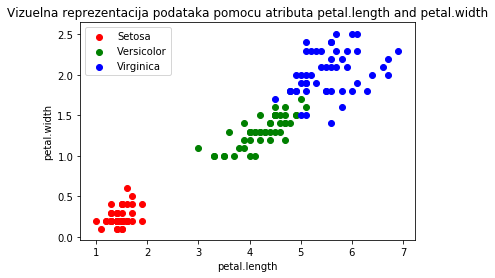

In [20]:
colors = ['red', 'green', 'blue']

for (v, c) in zip(variety, colors):
    subsamples = df.loc[df['variety'] == v]
    plt.scatter(subsamples[attr1], subsamples[attr2], color=c)
    
plt.title(f'Vizuelna reprezentacija podataka pomocu atributa {attr1} and {attr2}')
plt.legend(list(variety))

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.show()

In [21]:
w_init = np.zeros((m + 1, 1))
print('w_init:')
print(w_init)

w_init:
[[0.]
 [0.]
 [0.]]


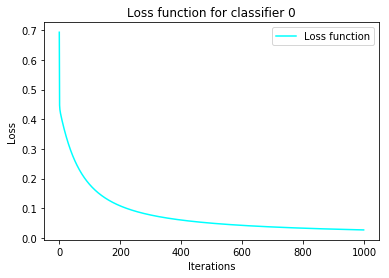

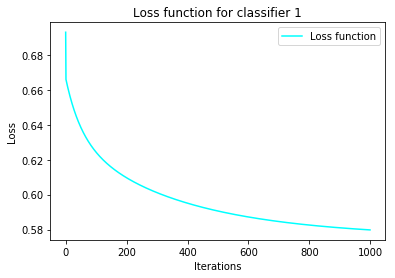

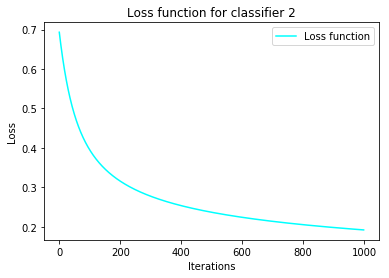

In [22]:
alpha = 0.2
num_iter = 1000
eps = 10e-6

models = train_classifiers(X, y, n_classes, alpha, num_iter, eps, plot=True)

In [23]:
print('--- Istrenirani modeli ---')
show_models(models)

--- Istrenirani modeli ---
Model fw_0 za prepoznavanje klase Setosa:
  * f_w = 1 / (1 + exp(-(6.02 + -1.646*petal.length+ -2.607*petal.width))
  * Loss: 0.02670026197352516
  * Last iteration: 1000

Model fw_1 za prepoznavanje klase Versicolor:
  * f_w = 1 / (1 + exp(-(-2.334 + 1.082*petal.length+ -2.05*petal.width))
  * Loss: 0.5797685109204943
  * Last iteration: 1000

Model fw_2 za prepoznavanje klase Virginica:
  * f_w = 1 / (1 + exp(-(-6.838 + 0.112*petal.length+ 3.869*petal.width))
  * Loss: 0.19245526779485234
  * Last iteration: 1000



In [24]:
# Provera uspesnosti istrenirnaog modela
petal_length = float(input('Unesite petal.length: '))
petal_width = float(input('Unesite petal.width: '))

In [25]:
x = np.array([1, petal_length, petal_width]).reshape(-1, 1)
f_w, info = predict(models, x, mapping_i_to_name)

print(f'Max f_w: {f_w}')
print(info)

Max f_w: 0.2427226883091698
Vrsta cveta: Versicolor

